In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from pprint import pprint
import statistics

In [2]:
csvPath = Path("Unplanned_Hospital_Visits-Hospital (1).csv")
Unplanned_Hospital_Visits_DataFrame = pd.read_csv(csvPath)
Unplanned_Hospital_Visits_DataFrame

C:\Users\baseb\AppData\Local\Temp\ipykernel_63824\1873689601.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  Unplanned_Hospital_Visits_DataFrame = pd.read_csv(csvPath)


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Number of Patients,Number of Patients Returned,Footnote,Start Date,End Date
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_AMI,Hospital return days for heart attack patients,Average Days per 100 Discharges,319,1.9,-13.2,19.6,305,81,NaN,7/1/2018,6/30/2021
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_HF,Hospital return days for heart failure patients,More Days Than Average per 100 Discharges,755,21.8,4.8,39.6,618,211,NaN,7/1/2018,6/30/2021
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_PN,Hospital return days for pneumonia patients,Average Days per 100 Discharges,436,-1.5,-17.3,16.7,412,99,NaN,7/1/2018,6/30/2021
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,254,14.1,10.1,19.6,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,OP_35_ADM,Rate of inpatient admissions for patients rece...,No Different Than the National Rate,214,10.2,7.7,13.2,Not Applicable,Not Applicable,NaN,1/1/2021,12/31/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67825,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,READM_30_COPD,Rate of readmission for chronic obstructive pu...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,5.0,7/1/2018,6/30/2021
67826,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,READM_30_HF,Heart failure (HF) 30-Day Readmission Rate,Not Available,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,5.0,7/1/2018,6/30/2021
67827,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,READM_30_HIP_KNEE,Rate of readmission after hip/knee replacement,Not Available,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,5.0,7/1/2018,6/30/2021
67828,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,READM_30_HOSP_WIDE,Rate of readmission after discharge from hospi...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,5.0,7/1/2020,6/30/2021


In [3]:
y = "Rate of unplanned hospital visits after colonoscopy (per 1,000 colonoscopies)"
axs = Unplanned_Hospital_Visits_DataFrame.loc[Unplanned_Hospital_Visits_DataFrame['Measure Name'] == y]
axs

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Number of Patients,Number of Patients Returned,Footnote,Start Date,End Date
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,254,14.1,10.1,19.6,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021
17,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,850,14.6,10.8,19.8,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021
31,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 629-1000,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,1505,12.5,9.4,16.4,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021
45,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,118,15.3,10.7,21.5,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021
59,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,62,14.3,9.8,20.6,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67763,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,1201 E HIGHWAY 287,MIDLOTHIAN,TX,76065,ELLIS,(469) 846-2000,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,44,13.9,9.5,20.1,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021
67777,670309,TEXAS HEALTH HOSPITAL MANSFIELD,2300 LONE STAR ROAD,MANSFIELD,TX,76063,TARRANT,(682) 341-5000,OP_32,Rate of unplanned hospital visits after colono...,Number of Cases Too Small,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,1.0,1/1/2019,12/31/2021
67791,670310,SE TEXAS ER & HOSPITAL,19211 MCKAY BLVD,HUMBLE,TX,77338,HARRIS,(704) 887-7283,OP_32,Rate of unplanned hospital visits after colono...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,5.0,1/1/2019,12/31/2021
67805,670314,ST MICHAELS MEDICAL HOSPITAL LLC,"16000 SOUTHWEST FREEWAY, SUITE 100",SUGAR LAND,TX,77479,FORT BEND,(281) 980-4357,OP_32,Rate of unplanned hospital visits after colono...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Applicable,Not Applicable,5.0,1/1/2019,12/31/2021


In [4]:
#MERGE / COMPARE WITH "HOSPITAL GENERAL INFO" (USE RATINGS), THEN CREATE A GRAPH CORRELATING THE TWO
csvPath = Path("Hospital_General_Information.csv")
Hospital_General_Information_DataFrame = pd.read_csv(csvPath)
Hospital_General_Information_DataFrame

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse,READM Group Footnote,Pt Exp Group Measure Count,Count of Facility Pt Exp Measures,Pt Exp Group Footnote,TE Group Measure Count,Count of Facility TE Measures,TE Group Footnote
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,0,10,1,NaN,8,8,NaN,12,9,NaN
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,0,10,0,NaN,8,8,NaN,12,11,NaN
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 629-1000,Acute Care Hospitals,Proprietary,...,0,8,1,NaN,8,8,NaN,12,9,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,0,6,0,NaN,8,8,NaN,12,5,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,0,4,0,NaN,8,Not Available,5.0,12,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,1201 E HIGHWAY 287,MIDLOTHIAN,TX,76065,ELLIS,(469) 846-2000,Acute Care Hospitals,Voluntary non-profit - Private,...,Not Available,Not Available,Not Available,5.0,8,Not Available,5.0,12,Not Available,5.0
5313,670309,TEXAS HEALTH HOSPITAL MANSFIELD,2300 LONE STAR ROAD,MANSFIELD,TX,76063,TARRANT,(682) 341-5000,Acute Care Hospitals,Proprietary,...,Not Available,Not Available,Not Available,5.0,8,Not Available,5.0,12,Not Available,5.0
5314,670310,SE TEXAS ER & HOSPITAL,19211 MCKAY BLVD,HUMBLE,TX,77338,HARRIS,(704) 887-7283,Acute Care Hospitals,Physician,...,Not Available,Not Available,Not Available,5.0,Not Available,Not Available,5.0,Not Available,Not Available,5.0
5315,670314,ST MICHAELS MEDICAL HOSPITAL LLC,"16000 SOUTHWEST FREEWAY, SUITE 100",SUGAR LAND,TX,77479,FORT BEND,(281) 980-4357,Acute Care Hospitals,Proprietary,...,Not Available,Not Available,Not Available,5.0,8,Not Available,5.0,12,Not Available,5.0


In [10]:
Hospital_General_Information_DataFrame.keys()

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services',
       'Meets criteria for promoting interoperability of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'MORT Group Measure Count', 'Count of Facility MORT Measures',
       'Count of MORT Measures Better', 'Count of MORT Measures No Different',
       'Count of MORT Measures Worse', 'MORT Group Footnote',
       'Safety Group Measure Count', 'Count of Facility Safety Measures',
       'Count of Safety Measures Better',
       'Count of Safety Measures No Different',
       'Count of Safety Measures Worse', 'Safety Group Footnote',
       'READM Group Measure Count', 'Count of Facility READM Measures',
       'Count of READM Measures Better',
       'Count of READM Measures No Different', 'Count of READM Measures Worse',
       'READM Group Footnote', 'Pt Exp Group Me

In [14]:
axis = Hospital_General_Information_DataFrame[['Facility ID','Hospital overall rating']]
axis = axis.replace(['Not Applicable', 'Not Available'], np.nan)
axis = axis.dropna()
axis

,Facility ID,Hospital overall rating
0,10001,3
1,10005,3
2,10006,2
3,10007,3
5,10011,2
...,...,...
5285,670103,4
5286,670106,1
5288,670108,5
5293,670120,3


In [8]:
axis.keys()

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure ID', 'Measure Name',
       'Compared to National', 'Denominator', 'Score', 'Lower Estimate',
       'Higher Estimate', 'Number of Patients', 'Number of Patients Returned',
       'Footnote', 'Start Date', 'End Date'],
      dtype='object')

In [16]:
x = pd.merge(axs, axis, how = 'inner', on = 'Facility ID')
x

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,...,Denominator,Score,Lower Estimate,Higher Estimate,Number of Patients,Number of Patients Returned,Footnote,Start Date,End Date,Hospital overall rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,OP_32,Rate of unplanned hospital visits after colono...,...,254,14.1,10.1,19.6,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,3
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,OP_32,Rate of unplanned hospital visits after colono...,...,850,14.6,10.8,19.8,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,3
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 629-1000,OP_32,Rate of unplanned hospital visits after colono...,...,1505,12.5,9.4,16.4,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,2
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,OP_32,Rate of unplanned hospital visits after colono...,...,118,15.3,10.7,21.5,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,3
4,10011,ST. VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,(205) 838-3122,OP_32,Rate of unplanned hospital visits after colono...,...,72,13.6,9.7,19.8,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,670103,MEDICAL CITY ALLIANCE,3101 NORTH TARRANT PARKWAY,FORT WORTH,TX,76177,TARRANT,(817) 639-1100,OP_32,Rate of unplanned hospital visits after colono...,...,89,15.3,10.8,21.4,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,4
3084,670106,HCA HOUSTON HEALTHCARE PEARLAND,11100 SHADOW CREEK PARKWAY,PEARLAND,TX,77584,BRAZORIA,(713) 770-7000,OP_32,Rate of unplanned hospital visits after colono...,...,34,14.3,10.2,20.2,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,1
3085,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,810 W HIGHWAY 71,MARBLE FALLS,TX,78654,BURNET,(830) 201-7308,OP_32,Rate of unplanned hospital visits after colono...,...,871,14.1,10.4,19.1,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,5
3086,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,2000 TRANSMOUNTAIN RD,EL PASO,TX,79911,EL PASO,(915) 877-8136,OP_32,Rate of unplanned hospital visits after colono...,...,101,14.5,10.3,20.7,Not Applicable,Not Applicable,NaN,1/1/2019,12/31/2021,3


In [20]:
x.dropna(subset = 'Hospital overall rating')
x = x[x['Hospital overall rating'] != 'Not Available']
x['Hospital overall rating'] = pd.to_numeric(x['Hospital overall rating'], errors='coerce')

In [25]:
grouped_df = x.groupby(['Measure Name'])['Hospital overall rating'].mean().reset_index()
grouped_df

,Measure Name,Hospital overall rating
0,Rate of unplanned hospital visits after colono...,3.21956


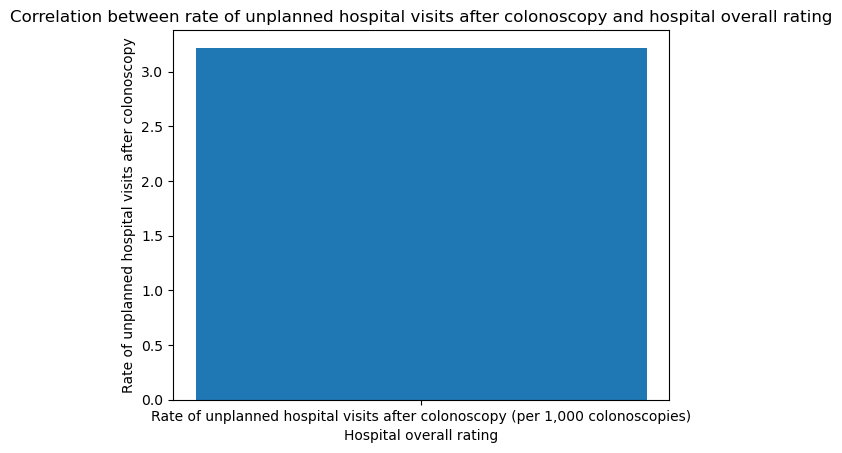

In [28]:
x = grouped_df['Measure Name']
y = grouped_df['Hospital overall rating']

plt.bar(x, y)
plt.ylabel('Rate of unplanned hospital visits after colonoscopy')
plt.xlabel('Hospital overall rating')
plt.title("Correlation between rate of unplanned hospital visits after colonoscopy and hospital overall rating")
plt.show()

In [ ]:
plt.bar(grouped_df['Measure Name'], grouped_df['Hospital overall rating'])
plt.bar(x, y)
plt.ylabel('Rate of unplanned hospital visits after colonoscopy')
plt.xlabel('Hospital overall rating')
plt.title("Correlation between rate of unplanned hospital visits after colonoscopy and hospital overall rating")
plt.show()